<a href="https://colab.research.google.com/github/TecnicalIt/ANN_ALL_PROJECT/blob/main/deep_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tensorflow
! pip install karas matplotlib numpy mnist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#important libarys
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [ ]:
# load dataset
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain[0].shape

(28, 28)

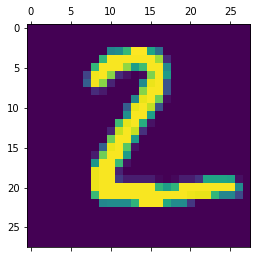

In [ ]:
plt.matshow(xtest[1])

In [ ]:
#normalization
xtest = xtest/255
xtrain= xtrain/255

In [ ]:
#28*28 to 784 flatten


784

In [ ]:
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [ ]:
xtest[1].shape

(784,)

build the model
sequential

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(Dense(64 , activation = 'relu' , input_dim = 784)) #input layer
model.add(Dense(64 , activation = 'relu' ))# hidden layer
model.add(Dense(10 , activation = 'softmax' ))#out put layer

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

train the model

In [ ]:
model.fit(xtrain,to_categorical(ytrain),
epochs = 10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2814 - accuracy: 0.9182
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1287 - accuracy: 0.9607
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0937 - accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0619 - accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.9837
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0371 - accuracy: 0.9880
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9893
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.028

In [ ]:
#evaluate the model
model.evaluate(xtest,to_categorical(ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9754


[0.08638755232095718, 0.9753999710083008]

In [ ]:
pred = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred

array([[1.63766227e-08, 4.58202365e-09, 5.64193385e-07, ...,
        9.99980032e-01, 9.88342890e-07, 4.21637452e-07],
       [2.28057950e-09, 3.49553993e-05, 9.99963582e-01, ...,
        1.78863500e-12, 1.73973362e-07, 5.56959730e-12],
       [2.21509367e-07, 9.99891937e-01, 1.77785751e-05, ...,
        1.48610161e-05, 1.39305230e-05, 1.78905317e-08],
       ...,
       [2.95605190e-21, 5.21924379e-11, 3.77690932e-15, ...,
        1.70657255e-09, 1.47055545e-11, 8.66277389e-07],
       [2.27937894e-13, 1.12620505e-13, 4.45175064e-15, ...,
        7.87881533e-13, 1.70545134e-09, 1.02814096e-14],
       [1.23214308e-12, 8.68544603e-13, 4.38732523e-11, ...,
        2.77457781e-18, 1.50586507e-13, 2.81101690e-15]], dtype=float32)

In [ ]:
np.argmax(pred[1])

2

313/313 [==============================] - 2s 6ms/step


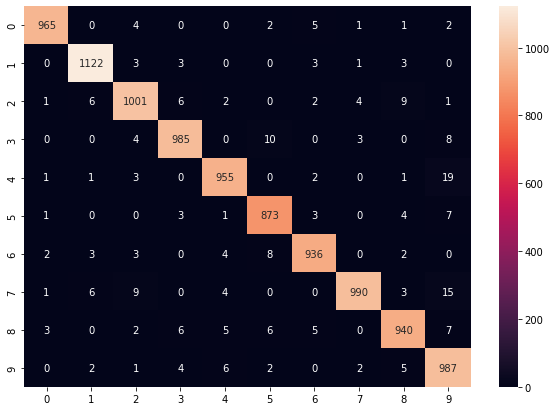

In [ ]:
pred = model.predict(xtest)
predt = [np.argmax(i) for i in pred]
con_mat = tf.math.confusion_matrix(labels = ytest,predictions=predt)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_mat,annot=True,fmt = "d")